In [1]:
from datascience import *
import numpy as np
%matplotlib inline

# Getting the data
---

This data was compiled from a number of queries from the NOAA (National Oceanic and Atmospheric Administration) website.

NOAA National Centers for Environmental information, Climate at a Glance: Regional Time Series, published October 2018, retrieved on October 18, 2018 from https://www.ncdc.noaa.gov/cag/

In [3]:
temps = Table.read_table("temperatures.csv")
temps

Year,Month,Region,Average Temperature
2000,1,Northeast Climate Region,21.4
2000,2,Northeast Climate Region,27.2
2000,3,Northeast Climate Region,39.1
2000,4,Northeast Climate Region,44.2
2000,5,Northeast Climate Region,56.6
2000,6,Northeast Climate Region,64.5
2000,7,Northeast Climate Region,65.8
2000,8,Northeast Climate Region,66.2
2000,9,Northeast Climate Region,58.9
2000,10,Northeast Climate Region,49.5


It contains a `Year` (2000 to 2018), `Month` (1 to 12), `Region` (a climate region), and `Average Temperature` (the average temperature for that year/month/region in degrees Farenheit).

# Let's go over some basics of `where`, `group`, columns on this dataset
---

By getting familiar with our dataset, it should be easier for us to answer questions we have a bit later.

Recall the syntax of the following functions:

`table.where ( column_label, are.predicate( value ) ) => copy of table with only rows satisfying condition`

`table.group ( column_label, method ) => copy of table with only unique rows from column_label and values calculated by the method, default is count`

`table.column ( column_label ) => an array of the column specified`

`table.with_column ( column_label, array_values ) => copy of table with a new column named column_label and values from the array_values`

In [4]:
# If we need any more information, we can always use help
help(Table.group)

Help on function group in module datascience.tables:

group(self, column_or_label, collect=None)
    Group rows by unique values in a column; count or aggregate others.
    
    Args:
        ``column_or_label``: values to group (column label or index, or array)
    
        ``collect``: a function applied to values in other columns for each group
    
    Returns:
        A Table with each row corresponding to a unique value in ``column_or_label``,
        where the first column contains the unique values from ``column_or_label``, and the
        second contains counts for each of the unique values. If ``collect`` is
        provided, a Table is returned with all original columns, each containing values
        calculated by first grouping rows according to ``column_or_label``, then applying
        ``collect`` to each set of grouped values in the other columns.
    
    Note:
        The grouped column will appear first in the result table. If ``collect`` does not
        accept argu

In [5]:
# As a helping hand to get started, let's find out what regions we have
np.unique(temps.column("Region"))

array(['Northeast Climate Region',
       'Northern Rockies and Plains Climate Region',
       'Northwest Climate Region', 'Ohio Valley Climate Region',
       'South Climate Region', 'Southeast Climate Region',
       'Southwest Climate Region', 'Upper Midwest Climate Region',
       'West Climate Region'],
      dtype='<U42')

In [8]:
region_names = np.unique(temps.column("Region"))
for region in region_names:
    print(region)

Northeast Climate Region
Northern Rockies and Plains Climate Region
Northwest Climate Region
Ohio Valley Climate Region
South Climate Region
Southeast Climate Region
Southwest Climate Region
Upper Midwest Climate Region
West Climate Region


# Play around with the dataset using `where`, `group`, etc
---

In [9]:
# Maybe find the data for just one region

In [10]:
# Maybe find the average temperature for each region

In [11]:
# Maybe find the average temperature for each year

In [12]:
# Maybe find the average temperature for each year for just one region

In [13]:
# Maybe find the average temperature for each month

In [14]:
# Maybe find the average temperature for any region containing "North" versus containing "South"

# Let's look at trends over time
---
What's a good way to represent this data?

How does temperature change over the course of a year?  What about two years?

How does temperature change over the course of 18 years?

In [15]:
























# Maybe a line plot :) 

In [16]:
# Plot against month for a given year

In [17]:
# Plot against month for a range of two years

In [18]:





















# Uh oh!
# We need some way to distinguish the months in one year from another year

In [19]:



















# Maybe give apply a shot

# Recall the syntax of `apply`
---

`table.apply ( method, column_name, column_name, ... ) => returns an array of the method applied to the values in the specified columns`

In [20]:
help(Table.apply)

Help on function apply in module datascience.tables:

apply(self, fn, *column_or_columns)
    Apply ``fn`` to each element or elements of ``column_or_columns``.
    If no ``column_or_columns`` provided, `fn`` is applied to each row.
    
    Args:
        ``fn`` (function) -- The function to apply.
        ``column_or_columns``: Columns containing the arguments to ``fn``
            as either column labels (``str``) or column indices (``int``).
            The number of columns must match the number of arguments
            that ``fn`` expects.
    
    Raises:
        ``ValueError`` -- if  ``column_label`` is not an existing
            column in the table.
        ``TypeError`` -- if insufficent number of ``column_label`` passed
            to ``fn``.
    
    Returns:
        An array consisting of results of applying ``fn`` to elements
        specified by ``column_label`` in each row.
    
    >>> t = Table().with_columns(
    ...     'letter', make_array('a', 'b', 'c', 'z'),
    

In [22]:
# Let's write a function to turn a year and month into a datetime that python can understand

import datetime

def make_date_from_year_month(year, month):
    return datetime.date(year, month, 1)

In [23]:
# Apply our function, what do we get?
temps.apply(make_date_from_year_month, "Year", "Month")

array([datetime.date(2000, 1, 1), datetime.date(2000, 2, 1),
       datetime.date(2000, 3, 1), ..., datetime.date(2018, 7, 1),
       datetime.date(2018, 8, 1), datetime.date(2018, 9, 1)], dtype=object)

In [24]:
# Okay, what can we do with that?
temps_with_date = temps.with_column("Date", temps.apply(make_date_from_year_month, "Year", "Month"))
temps_with_date

Year,Month,Region,Average Temperature,Date
2000,1,Northeast Climate Region,21.4,2000-01-01
2000,2,Northeast Climate Region,27.2,2000-02-01
2000,3,Northeast Climate Region,39.1,2000-03-01
2000,4,Northeast Climate Region,44.2,2000-04-01
2000,5,Northeast Climate Region,56.6,2000-05-01
2000,6,Northeast Climate Region,64.5,2000-06-01
2000,7,Northeast Climate Region,65.8,2000-07-01
2000,8,Northeast Climate Region,66.2,2000-08-01
2000,9,Northeast Climate Region,58.9,2000-09-01
2000,10,Northeast Climate Region,49.5,2000-10-01


# Let's finally plot monthly temperatures over multiple years
---

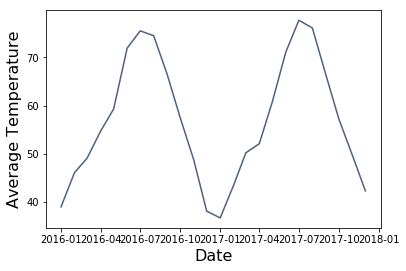

In [27]:
start_date = datetime.date(2016, 1, 1)
end_date = datetime.date(2018, 1, 1)

temps_with_date.where(
    "Region", are.containing("West")
).where(
    "Date", are.between(start_date, end_date)
).plot("Date", "Average Temperature")

In [28]:
# Let's change the start date to look at the temperature from 2000 to 2018

# Alright, what about annual average temperature over time
---

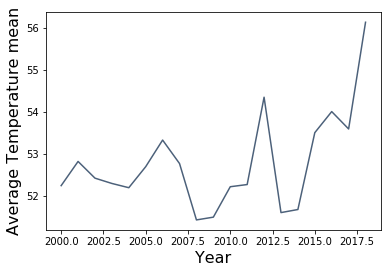

In [29]:
temps.group("Year", np.mean).plot("Year", "Average Temperature mean")

What if I just wanted to look at West Climate Region?

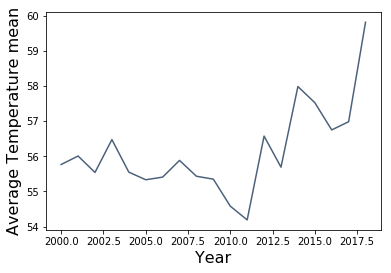

In [30]:
temps.where("Region", are.containing("West")).group("Year", np.mean).plot("Year", "Average Temperature mean")

In [31]:
# Is there anything weird?

# Why?

# What does the distribution of ___ look like?
---

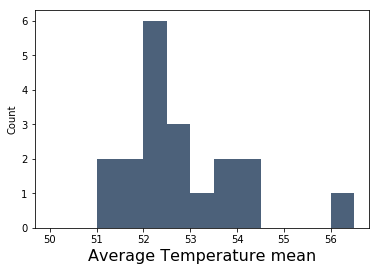

In [32]:
temps.group("Year", np.mean).hist(3, normed=False, bins=np.arange(50, 57, 0.5))

In [35]:
# We can change "Year" and np.mean to a bunch of different stuff

# Make sure that we allow default bins if we don't fully know what we're working with

# Let's use normed=False to get counts instead of density--a little easier to understand

How many years had an average temperature greater than 54°F, using counts?

In [36]:
# How many years had an avg temp of > 54

# This IS just the sum of 2 + 1
3

3

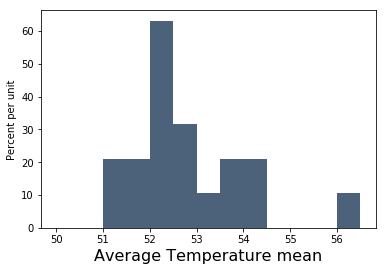

In [37]:
# Let's try the distribution of annual average temperatures
temps.group("Year", np.mean).hist(3, normed=True, bins=np.arange(50, 57, 0.5))

How many years had an average temperature greater than 54°F, using density?

In [38]:
# We need to know how many years we have
temps.group("Year", np.mean).num_rows

19

In [39]:
# We have 19 years
# How many years had an avg temp of > 54

# This ISN"T 20% + 10%

# This IS 20% * bin_size + 10% * bin_size
# 20% * 0.5 + 10% * 0.5
19 * 0.15

2.85

# We want to compare annual average temperature accross multiple regions
---

There's an easy way and a hard way to go about this.

The way that we're most comfortable with starting is actually much more challenging... let's do it anyways

In [40]:
# I want to compare Northeast to West

# What should my logic be to compare Annual Avg Temps for Northeast to those of West?





























# We've done this before for one region:

# Get data for just that region, then group by year

In [41]:
# Grab data for just northeast
northeast_data = temps.where("Region", are.containing("Northeast"))
northeast_data

Year,Month,Region,Average Temperature
2000,1,Northeast Climate Region,21.4
2000,2,Northeast Climate Region,27.2
2000,3,Northeast Climate Region,39.1
2000,4,Northeast Climate Region,44.2
2000,5,Northeast Climate Region,56.6
2000,6,Northeast Climate Region,64.5
2000,7,Northeast Climate Region,65.8
2000,8,Northeast Climate Region,66.2
2000,9,Northeast Climate Region,58.9
2000,10,Northeast Climate Region,49.5


In [42]:
# Grab data for just west
west_data = temps.where("Region", are.containing("West"))

In [43]:
# Group both by year
northeast_years = northeast_data.group("Year", np.mean)
west_years = west_data.group("Year", np.mean)

But now I have two separate tables.  We've only learned how to plot from one table so far.

We can use matplotlib to circumvent that (don't worry, you don't need to know how to do this)

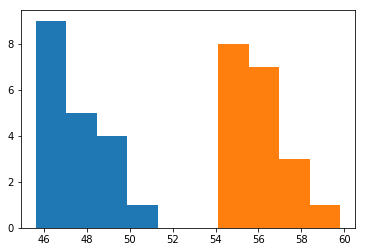

In [44]:
# Don't worry about this code too much.
import matplotlib.pyplot as plt

plt.hist(
    [northeast_years.column("Average Temperature mean"), west_years.column("Average Temperature mean")],
    histtype='stepfilled'
)
plt.show()

Or we can create a new table, add our columns to it, and then plot

In [45]:
# Create a new table with a column for Northeast and a column for West, and rows for every year
northeast_vs_west = Table().with_columns(
    "Northeast", northeast_years.column("Average Temperature mean"),
    "West", west_years.column("Average Temperature mean")
)

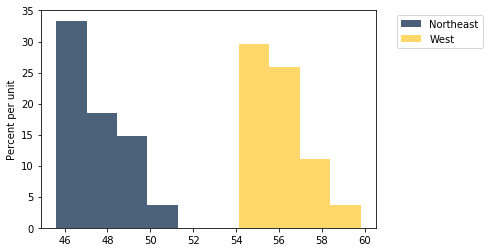

In [46]:
# We can histogram this table normally
northeast_vs_west.hist()

# There's an easier way
---

Using `table.pivot` we can essentially perform `.where`, `.group`, and `.column` for every region at once.

Let's delve into [the documentation](http://data8.org/datascience/_autosummary/datascience.tables.Table.pivot.html) to find out how to use this method.

In [51]:
# Before we use the method, we should think clearly about what we want to achieve
all_year_avgs = temps.pivot("Region", "Year", values="Average Temperature", collect=np.mean)
all_year_avgs

Year,Northeast Climate Region,Northern Rockies and Plains Climate Region,Northwest Climate Region,Ohio Valley Climate Region,South Climate Region,Southeast Climate Region,Southwest Climate Region,Upper Midwest Climate Region,West Climate Region
2000,46.0333,44.0417,45.9333,53.8083,63.4667,62.6667,53.9667,44.5167,55.7667
2001,47.7167,44.9333,46.325,54.775,63.1583,63.15,53.5667,45.7417,56.0083
2002,47.7083,43.55,45.9,54.7917,62.525,63.65,53.1,45.0333,55.5417
2003,45.6083,44.4,47.5583,53.3083,62.65,62.6167,54.1833,43.8667,56.475
2004,46.275,44.1083,47,54.2,62.7833,63.1667,52.5583,44.1167,55.55
2005,47.1333,44.8833,46.225,54.925,63.5,63.1667,53.4417,45.65,55.3333
2006,48.6833,45.7583,46.5583,55.3417,64.3667,63.7833,53.35,46.7,55.4083
2007,46.7167,44.9833,46.5083,55.3417,62.7583,64.1667,53.3833,45.1833,55.8833
2008,46.85,42.3833,45.075,53.025,62.4167,62.9417,52.3083,42.4333,55.4333
2009,46.125,42.1833,45.525,53.2417,62.575,62.8167,52.7333,42.9083,55.35


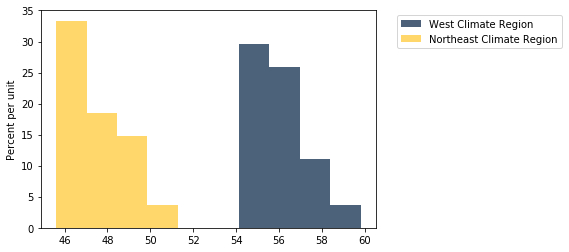

In [52]:
# Now let's compare West Climate Region to Northeast Climate Region
all_year_avgs.hist("West Climate Region", "Northeast Climate Region")

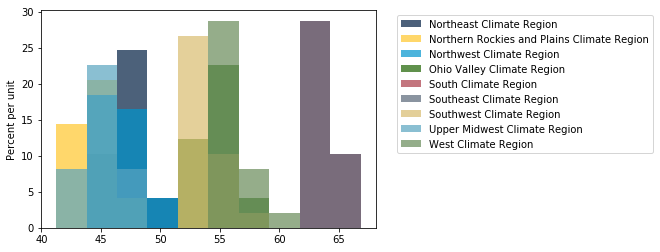

In [50]:
# We can even compare every region this way
all_year_avgs.hist(np.arange(1, 10))

# Let's finish with some knowledge about histograms
---

We might have some questions about these histograms, and we should figure out the answers!

Q. What do histograms measure?

Q. Why the histograms for some regions taller than others?

Q. What do we know is true for every region's histogram?

Q. If we change to density (`normed=False`) then does our previous answer change?

Q. How do we calculate the number of occurrences of a certain bin using counts (`normed=False`)?

Q. How do we calculate the number of occurrences of a certain bin using density?